# Materials

This test showcases rendering with various materials provided by Lightmetrica. We render the images using ``renderer::pt``.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lmenv
env = lmenv.load('.lmenv')

In [3]:
import os
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt
import lightmetrica as lm
%load_ext lightmetrica_jupyter
import lmscene

In [4]:
lm.init()
lm.log.init('jupyter')
lm.progress.init('jupyter')
lm.info()
lm.comp.load_plugin(os.path.join(env.bin_path, 'accel_embree'))
if not lm.Release:
    lm.parallel.init('openmp', num_threads=1)
    lm.debug.attach_to_debugger()

[I|0.000] Lightmetrica -- Version 3.0.0 (rev. 70601db) Linux x64
[I|0.000] Loading plugin [name='accel_embree']
[I|0.001] .. Successfully loaded [name='accel_embree']


In [5]:
def render(scene, name, **kwargs):
    w = 854
    h = 480
    film = lm.load_film('film', 'bitmap', w=w, h=h)
    renderer = lm.load_renderer('renderer', name,
        scene=scene,
        output=film,
        max_verts=20,
        scheduler='time',
        render_time=30,
        **kwargs)
    renderer.render()
    return np.copy(film.buffer())

def display_image(img, fig_size=15, scale=1):
    f = plt.figure(figsize=(fig_size,fig_size))
    ax = f.add_subplot(111)                                                                                                                                                
    ax.imshow(np.clip(np.power(img*scale,1/2.2),0,1), origin='lower')
    ax.axis('off')
    plt.show()

## Scene setup

In [6]:
# Create scene
accel = lm.load_accel('accel', 'embree')
scene = lm.load_scene('scene', 'default', accel=accel)
mat = lm.load_material('mat_ut', 'diffuse', Kd=[1,1,1])
lmscene.bunny_with_area_light(scene, env.scene_path, mat_knob=mat)
scene.build()

[I|0.035] Loading asset [name='accel']
[I|0.035] .. {"intcost":1.0,"maxBranchingFactor":2,"maxDepth":18,"maxLeafSize":32,"minLeafSize":1,"quality":1,"sahBlockSize":1,"travcost":1.0}
[I|0.035] .. {"compact":false,"dynamic":false,"filter":false,"robust":false}
[I|0.035] Loading asset [name='scene']
[I|0.036] Loading asset [name='mat_ut']
[I|0.036] Loading asset [name='camera_main']
[I|0.036] Loading asset [name='model_obj']
[I|0.036] .. Loading OBJ file [path='bunny_with_planes.obj']
[I|0.191] Loading asset [name='mat_diffuse_white']
[I|0.191] Loading asset [name='tex_floor']
[I|0.192] .. Loading texture [path='default.png']
[I|0.192] Loading asset [name='mat_floor']
[I|0.192] Loading asset [name='mat_black']
[I|0.193] Loading asset [name='light']
[I|0.196] Building acceleration structure [name='accel']
[I|0.196] .. Flattening scene


[I|0.203] .. Building


## Rendering

### Diffse material

`material::diffuse`

[I|0.269] Loading asset [name='mat_ut']
[I|0.269] .. Asset [name='mat_ut'] has been already loaded. Replacing..
[I|0.269] Loading asset [name='film']
[I|0.285] Loading asset [name='renderer']


  0%|          | 0/30.0 [00:00<?, ?it/s]

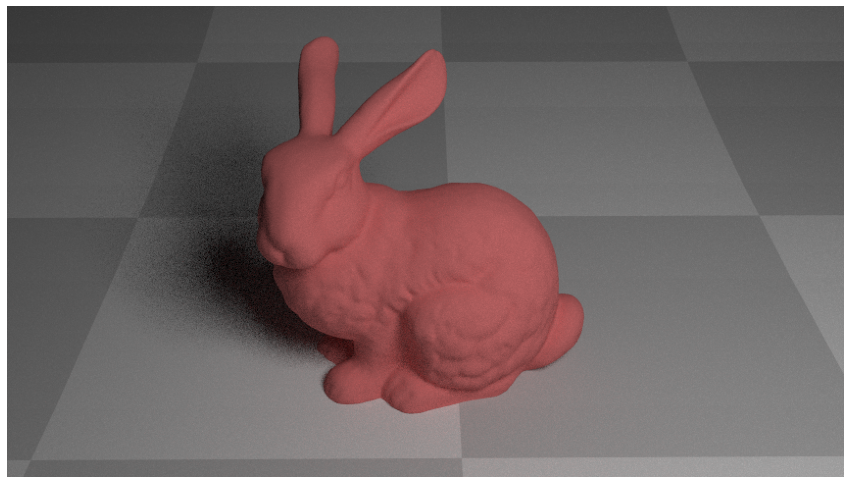

In [7]:
lm.load_material('mat_ut', 'diffuse', Kd=[.8,.2,.2])
img = render(scene, 'pt')
display_image(img)

### Glossy material

`material::glossy`

[I|31.413] Loading asset [name='mat_ut']
[I|31.413] .. Asset [name='mat_ut'] has been already loaded. Replacing..
[I|31.413] Loading asset [name='film']
[I|31.414] .. Asset [name='film'] has been already loaded. Replacing..
[I|31.427] Loading asset [name='renderer']
[I|31.427] .. Asset [name='renderer'] has been already loaded. Replacing..


  0%|          | 0/30.0 [00:00<?, ?it/s]

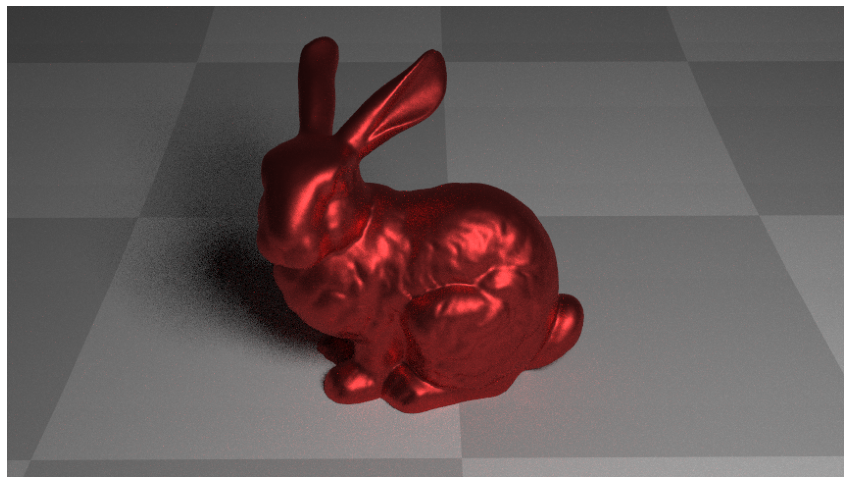

In [8]:
lm.load_material('mat_ut', 'glossy', Ks=[.8,.2,.2], ax=0.2, ay=0.2)
img = render(scene, 'pt')
display_image(img)

### Perfect specular reflection

`material::mirror`

[I|62.470] Loading asset [name='mat_ut']
[I|62.470] .. Asset [name='mat_ut'] has been already loaded. Replacing..
[I|62.470] Loading asset [name='film']
[I|62.470] .. Asset [name='film'] has been already loaded. Replacing..
[I|62.483] Loading asset [name='renderer']
[I|62.483] .. Asset [name='renderer'] has been already loaded. Replacing..


  0%|          | 0/30.0 [00:00<?, ?it/s]

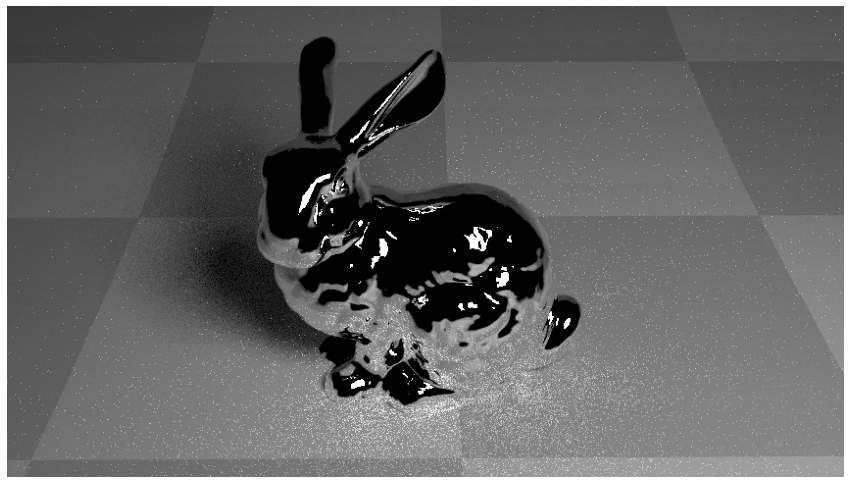

In [9]:
lm.load_material('mat_ut', 'mirror')
img = render(scene, 'pt')
display_image(img)

### Fresnel reflection / refraction

`material::fresnel`

[I|93.684] Loading asset [name='mat_ut']
[I|93.684] .. Asset [name='mat_ut'] has been already loaded. Replacing..
[I|93.684] Loading asset [name='film']
[I|93.684] .. Asset [name='film'] has been already loaded. Replacing..
[I|93.697] Loading asset [name='renderer']
[I|93.697] .. Asset [name='renderer'] has been already loaded. Replacing..


  0%|          | 0/30.0 [00:00<?, ?it/s]

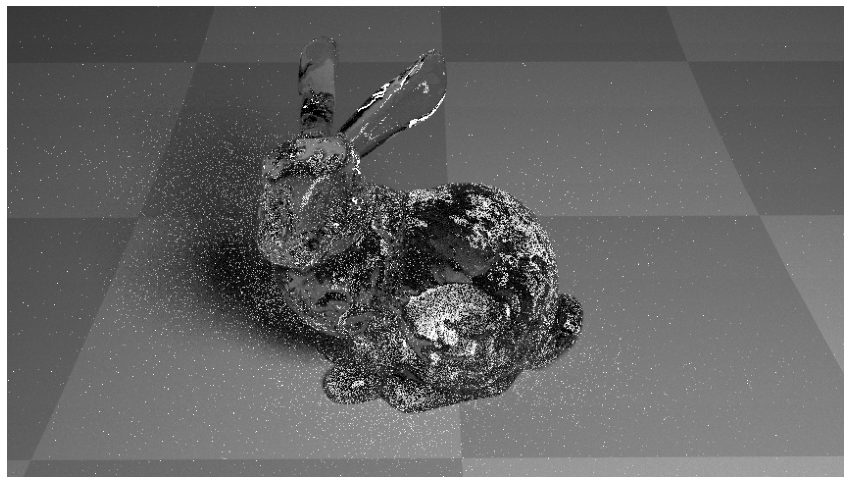

In [10]:
lm.load_material('mat_ut', 'glass', Ni=1.5)
img = render(scene, 'pt')
display_image(img)

### Mixture material with constant weights using RR

`material::constant_weight_mixture_rr`

[I|125.107] Loading asset [name='mat_diffuse']
[I|125.107] Loading asset [name='mat_glossy']
[I|125.107] Loading asset [name='mat_mirror']
[I|125.107] Loading asset [name='mat_ut']
[I|125.108] .. Asset [name='mat_ut'] has been already loaded. Replacing..
[I|125.108] Loading asset [name='film']
[I|125.108] .. Asset [name='film'] has been already loaded. Replacing..
[I|125.121] Loading asset [name='renderer']
[I|125.121] .. Asset [name='renderer'] has been already loaded. Replacing..


  0%|          | 0/30.0 [00:00<?, ?it/s]

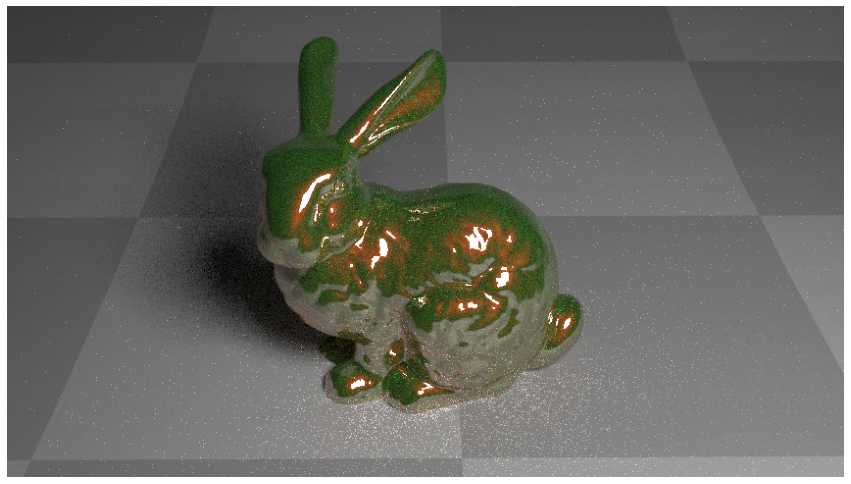

In [11]:
mat_diffuse = lm.load_material('mat_diffuse', 'diffuse', Kd=[.1,.8,.1])
mat_glossy = lm.load_material('mat_glossy', 'glossy', Ks=[.8,.1,.1], ax=0.2, ay=0.2)
mat_mirror = lm.load_material('mat_mirror', 'mirror')
mat = lm.load_material('mat_ut', 'constant_weight_mixture_rr', [
    {'material': mat_diffuse.loc(), 'weight': 0.2},
    {'material': mat_glossy.loc(), 'weight': 0.4},
    {'material': mat_mirror.loc(), 'weight': 0.4}
])
img = render(scene, 'pt')
display_image(img)

### Mixture material with constant weights using marginalization 

`material::constant_weight_mixture_marginalized`

[I|156.573] Loading asset [name='mat_ut']
[I|156.574] .. Asset [name='mat_ut'] has been already loaded. Replacing..
[I|156.574] Loading asset [name='film']
[I|156.574] .. Asset [name='film'] has been already loaded. Replacing..
[I|156.587] Loading asset [name='renderer']
[I|156.587] .. Asset [name='renderer'] has been already loaded. Replacing..


  0%|          | 0/30.0 [00:00<?, ?it/s]

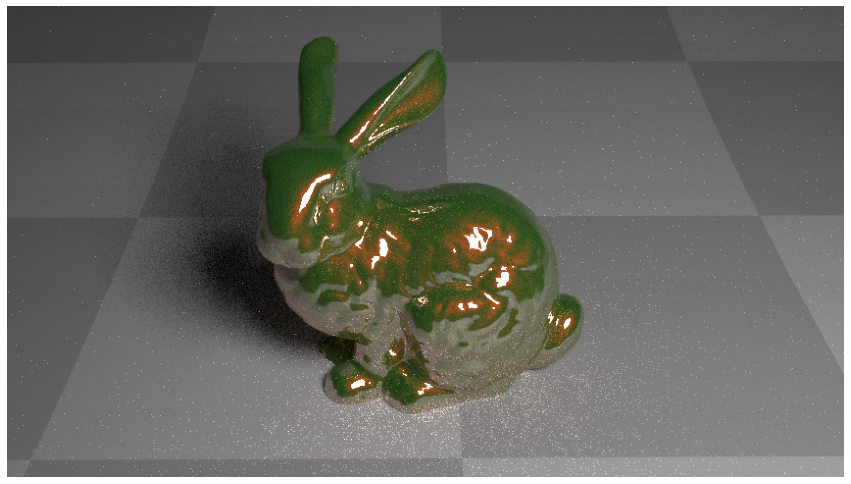

In [12]:
mat = lm.load_material('mat_ut', 'constant_weight_mixture_marginalized', [
    {'material': mat_diffuse.loc(), 'weight': 0.2},
    {'material': mat_glossy.loc(), 'weight': 0.4},
    {'material': mat_mirror.loc(), 'weight': 0.4}
])
img = render(scene, 'pt')
display_image(img)

### Mixture material with alpha texture

`material::mixture_wavefrontobj`

This material is the default material converted from MTL format of Wavefront OBJ.

[I|187.689] Loading asset [name='tex']
[I|187.689] .. Loading texture [path='leaf.png']
[I|187.692] Loading asset [name='mat_ut']
[I|187.692] .. Asset [name='mat_ut'] has been already loaded. Replacing..
[I|187.692] Loading asset [name='film']
[I|187.693] .. Asset [name='film'] has been already loaded. Replacing..
[I|187.706] Loading asset [name='renderer']
[I|187.706] .. Asset [name='renderer'] has been already loaded. Replacing..


  0%|          | 0/30.0 [00:00<?, ?it/s]

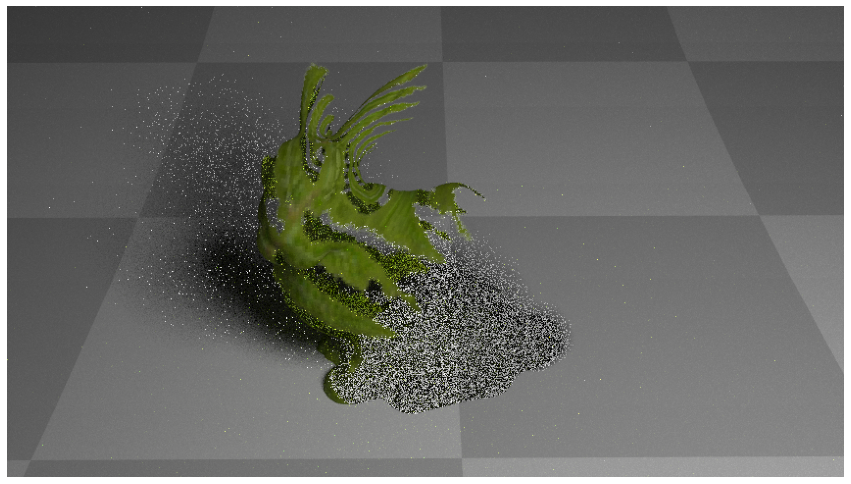

In [13]:
tex = lm.load_texture('tex', 'bitmap',
    path=os.path.join(env.scene_path, 'fireplace_room', 'textures', 'leaf.png'))
lm.load_material('mat_ut', 'mixture_wavefrontobj',
    Kd=[.8,.8,.8],
    mapKd=tex,
    Ks=[0,0,0],
    ax=0.2,
    ay=0.2,
    no_alpha_mask=False)
img = render(scene, 'pt')
display_image(img)